## Exercise 1
Write a function that can return the number of detected objects in the images `data/masks` folder. The write a loop to check the number of objects for each image.

In [2]:
from skimage.io import imread
import os

directory = './../data/masks/'
masks_list = sorted(os.listdir(directory))

def number_objects(mask):
    return mask.max()

for mask in masks_list:
    img = imread(directory + mask)
    print(number_objects(img))

4
12
7
7
5
6
6
15
9
7
3
8
6
10
10


## Exercise 2
Can you now write a function that uses the function define in Exercise 1 and returns the maximum number of detected cells in all the `data/masks/` folder?

In [6]:
def max_number_objects(folder):
    objects_per_image = []
    masks_list = sorted(os.listdir(directory))
    for mask in masks_list:
        img = imread(directory + mask)
        objects_per_image.append(number_objects(img))
    return max(objects_per_image)

max_number_objects(directory)

15

## Exercise 3
Explore the documentation of [`scikit-image.color`](https://scikit-image.org/docs/stable/api/skimage.color.html#module-skimage.color) and find a way to create a composite image between the raw image in `data/raw_images/` and the corresponding mask in `data/masks/`.

Example output:
![](../../slides/assets/cell_segmented_overlay.png)

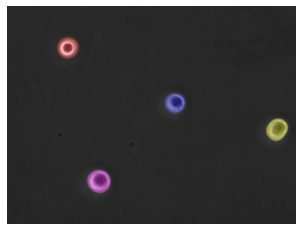

In [13]:
from skimage.color import label2rgb
from matplotlib import pyplot as plt

mask = imread('./../data/masks/hct116_1_cp_masks.tif')
img = imread('./../data/raw_images/hct116_1.tif')
composite = label2rgb(mask, img)
plt.imshow(composite)
plt.axis('off')
plt.show()

## Exercise 4
Look at the documentaton for [`pandas.cut`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) and define a custom column called `area_cat` in which you define 3 categories for the area column of any dataframes in the `data/measurements/` folder, as `small`, `medium`, `large`.

In [19]:
import pandas as pd

df = pd.read_csv('./../data/measurements/mdck_5_cp_masks_props.csv')
df['area_cat'] = pd.cut(df['area'], 3, labels=['small','medium','large'])
df.head()

label  area   perimeter  eccentricity  feret_diameter_max  centroid-0  \
0      1  7738  339.693434      0.736458          119.218287   35.366632   
1      2  6395  299.320851      0.352588           94.667840  103.348397   
2      3  6212  291.906638      0.382498           94.371606  117.685126   
3      4  6606  301.906638      0.438843           98.898938  309.215107   
4      5  9292  357.019336      0.383479          114.057003  389.787452   

    centroid-1  equivalent_diameter_area  axis_minor_length  \
0   160.630137                 99.258892          82.261832   
1  1234.734480                 90.235065          87.334537   
2  1048.171442                 88.934605          85.497907   
3   648.173327                 91.711616          86.954278   
4  1118.441670                108.770133         104.538948   

   axis_major_length             filename area_cat  
0         121.602070  mdck_5_cp_masks.tif    large  
1          93.328183  mdck_5_cp_masks.tif   medium  
2          92.534589  mdck_5_cp_masks.tif   medium  
3          96.770307  mdck_5_cp_masks.tif   medium  
4         113.192556  mdck_5_cp_masks.tif    large

## Exercise 5
Can you write a script that creates all the measurement tables found in `data/measurements/` from the masks found in `data/masks/`?

In [54]:
from skimage.measure import regionprops_table
from skimage.io import imread
import pandas as pd
import os

input_directory = './../data/masks/'
output_directory = './../data/measurements/'

masks_list = sorted(os.listdir(input_directory))

for mask in masks_list:
    img = imread(input_directory + mask)
    props = pd.DataFrame(regionprops_table(img, properties=['label','area', 'perimeter', 'eccentricity','feret_diameter_max', 'centroid', 'equivalent_diameter_area','axis_minor_length','axis_major_length']))
    props['filename'] = mask
    props.to_csv(output_directory + mask.replace('.tif','') + '_props.csv', index=False)

## Exercise 6
Using the `scikit-image.measure.regionprops` function, write a script that finds the largest cells detected in all the images without using pandas dataframes (use lists and dictionaries instead).

Can you write the code in a way in which you can keep track of the label and image name of the found largest cell?

In [52]:
from skimage.measure import regionprops
from collections import defaultdict

areas_dict = defaultdict(dict)
for mask in masks_list:
    img = imread(directory + mask)
    props = regionprops(img)
    areas_dict[mask] = defaultdict(dict)
    for prop in props:
        areas_dict[mask][prop.label]= prop.area

largest_cell = defaultdict(dict)
current_max = 0
for img_name, props in areas_dict.items():
    for label, area in props.items():
        if area > current_max: 
            current_max = area
            largest_cell['img_name'] = img_name
            largest_cell['label'] = label
            largest_cell['area'] = area

print('The largest cell is found in image', largest_cell['img_name'], 'with label', largest_cell['label'], 'and area value of', largest_cell['area'])

The largest cell is found in image mcf7_5_cp_masks.tif with label 6 and area value of 16213


## Exercise 7
Use seaborn to create a scatterplot between `equivalent_diameter_area` and `feret_diameter_max` separated by cell line as columns.

Find a seaborn function that can also add a regression line between the two variables.

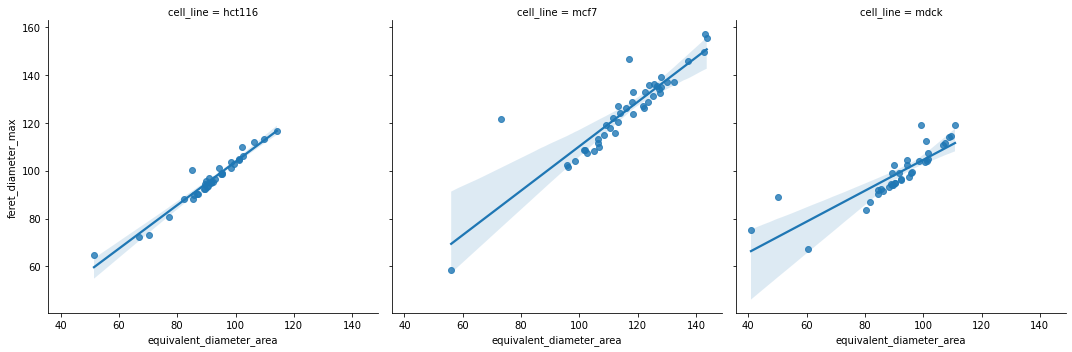

In [91]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

directory = './../data/measurements/'
csv_list = sorted(os.listdir(directory))

df_list = []
for csv_name in csv_list:
    df_list.append(pd.read_csv(directory + csv_name))

df_full = pd.concat(df_list)
df_full['cell_line'] = df_full['filename'].str.split('_', expand=True)[0]

# sns.relplot(data=df_full, x='equivalent_diameter_area', y='feret_diameter_max', col='cell_line')
sns.lmplot(data=df_full, x='equivalent_diameter_area', y='feret_diameter_max', col='cell_line')
plt.show()

## Exercise 8
Use base matplotlib functions to create a single figure with 3 overlapping histograms of the 3 cell lines equivalent_diameter_area.

Try to modify its appearance to make it as beautiful and clear as possible.

Create a legend to explain each histogram with its cell line name.

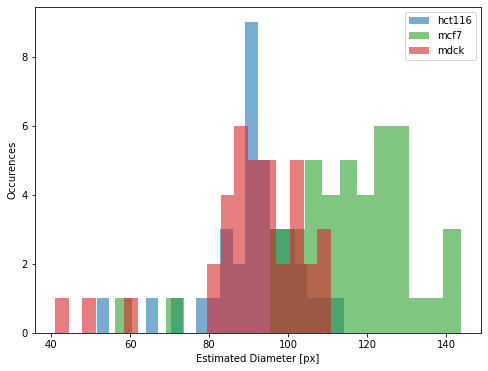

In [129]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.reset_orig()

directory = './../data/measurements/'
csv_list = sorted(os.listdir(directory))

df_list = []
for csv_name in csv_list:
    df_list.append(pd.read_csv(directory + csv_name))

df_full = pd.concat(df_list)
df_full['cell_line'] = df_full['filename'].str.split('_', expand=True)[0]

cell_lines = df_full.cell_line.unique()

colors = ['tab:blue','tab:green','tab:red']
f, ax = plt.subplots(1, figsize=(8,6))
for index, cell_line in enumerate(cell_lines):
    current_df = df_full[df_full['cell_line'] == cell_line].copy()
    ax.hist(current_df['equivalent_diameter_area'], alpha=0.6, bins=20, color=colors[index], label=cell_line)
ax.set(xlabel='Estimated Diameter [px]', ylabel='Occurences')
plt.legend()
plt.show()

## Exercise 9
Write a script that combines the use of `skimage.measure.regionprops` and `matplotlib.imshow` to only show an crop of a single cell (selected by cell label) from a single image. 

You can create an outline around the selected cell of the raw image to display.

Can you add an overlay on the selected image displaying its total area?

(1219.0, 1322.0)

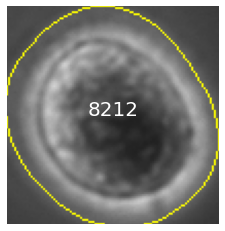

In [87]:
from skimage.measure import regionprops
from skimage.io import imread
from matplotlib import pyplot as plt
from skimage.segmentation import mark_boundaries
import os



img = imread('./../data/raw_images/hct116_1.tif')
mask = imread('./../data/masks/hct116_1_cp_masks.tif')
props = regionprops(mask)

cell_label = 3
for prop in props:
    if prop.label == cell_label:
        min_row, min_col, max_row, max_col = prop.bbox
        area = prop.area

composite_img = mark_boundaries(img, mask)
        
f, ax = plt.subplots(1)
ax.imshow(composite_img)
ax.axis('off')
ax.text(0.5,0.5, str(area), transform=ax.transAxes, color='white', ha='center', fontsize=20)
ax.set_ylim(min_row, max_row)
ax.set_xlim(min_col, max_col)